- 요일별 교통사고 사망자 수 시각화하기

In [2]:
# 라이브러리 불러오기
# 라이브러리(1.numpy, 2.pandas, 3.matpololib)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# 파일 읽어오기
# 인코딩을 해줘야 함
data = pd.read_csv("./Traffic_Accident_2017.csv", encoding="euc-kr")
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [4]:
# 데이터의 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [5]:
# 생략된 전체 데이터 출력하고 싶다면
# 판다스 내부의 출력 옵션 설정
pd.set_option('display.max_columns', None)

In [6]:
# data에서 '요일'컬럼만 가져오기
# 인덱싱 -> 시리즈 형태로 출력
data['요일']

0       일
1       일
2       일
3       일
4       일
       ..
4060    일
4061    일
4062    일
4063    일
4064    일
Name: 요일, Length: 4065, dtype: object

In [9]:
# 각각 value들의 갯수 세기
count = data['요일'].value_counts()
count

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [12]:
# 월화수목금토일 순서가 되도록 바꿔주기 -> 여러개는 리스트로 담아 가져올 수 잇다
count[['월', '화', '수', '목', '금', '토', '일']]

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

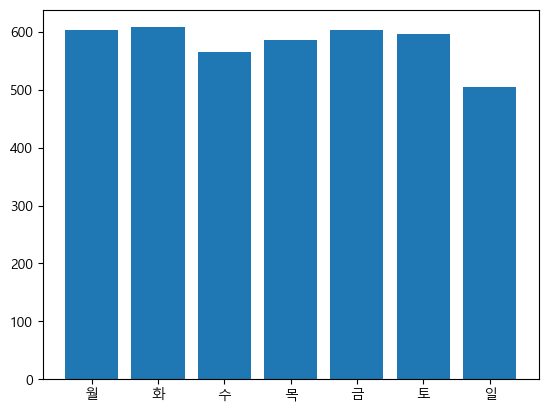

In [20]:
y = count[['월', '화', '수', '목', '금', '토', '일']]
x = y.index

# bar 그래프 그려주기
plt.bar(x,y)
plt.show()

In [14]:
# 차크 그릴 때 한글 깨짐 대처방법 --> 인코딩
from matplotlib import rc
rc('font', family="Malgun Gothic")

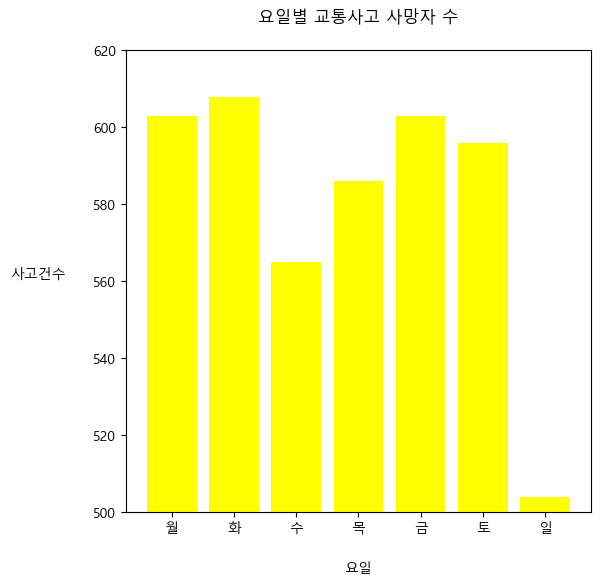

In [37]:
plt.figure(figsize=(6,6))
plt.bar(x,y, color="yellow")
# 차트의 범위 설정
plt.ylim(500, 620)

# x축 이름
plt.xlabel("요일", labelpad=20)
# y축 이름, rotation=0: 가로출력
plt.ylabel("사고건수", labelpad=40).set_rotation(0)
# 그래프 이름
plt.title("요일별 교통사고 사망자 수", pad=20)
plt.show()

In [44]:
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,충남,홍성군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,충남,아산시,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,서울,금천구,차대사람,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,경남,사천시,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,부산,기장군,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,강원,홍천군,차량단독,도로이탈,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,경기,동두천시,차대차,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [55]:
# 사고유형 대분류에서 차대차 사건만 가져와보자 (열 인덱싱)
data['사고유형_대분류']

0        차대차
1       차대사람
2        차대차
3       차량단독
4       차대사람
        ... 
4060     차대차
4061    차량단독
4062    차량단독
4063     차대차
4064    차대사람
Name: 사고유형_대분류, Length: 4065, dtype: object

In [61]:
# 각각의 밸류(값이 얼마나 있는지 카운트 해보기)
data['사고유형_대분류'].value_counts()

차대차      1642
차대사람     1601
차량단독      821
철길건널목       1
Name: 사고유형_대분류, dtype: int64

In [66]:
# '사고유형_대분류' 컬럼에서 차대차 교통사고만 가져오기
# DataFrame / Series
car_data = data[data['사고유형_대분류']=='차대차']

# 불리언 인텍싱 => 가져오고 싶은 데이터[조건]

In [70]:
# 데이터에서 사상자수, 발생지시도 컬럼만 가져오기
data1 = car_data[['사상자수', '발생지시도']]

In [72]:
# 시도별로 몇명의 사상자 수가 있는지 확인

# data1['발생지시도'].value_counts()
# 이 방법은 하나의 발생지시도에 여러건의 사상자 수가 존재하는 것을 세지 못하기 떄문에 부적합함

경기    330
충남    163
경북    156
경남    146
전남    134
전북    133
서울    112
충북     95
강원     80
대구     67
부산     53
광주     42
인천     41
제주     27
대전     27
울산     26
세종     10
Name: 발생지시도, dtype: int64

In [81]:
# groupby('기준') - 같은 값을 하나로 묶어서 총계값을 얻기위해서 사용하는 함수
res = data1.groupby('발생지시도').sum()
res
# groupy를 사용했을때 기본적으로 그룹라벨이 인덱스로 들어간다

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


In [82]:
# 인덱서 / loc : 컬럼명, iloc : 인덱스
# x축 값 담아주기
x = res.index
# y축 값 담아주기
y = res.values


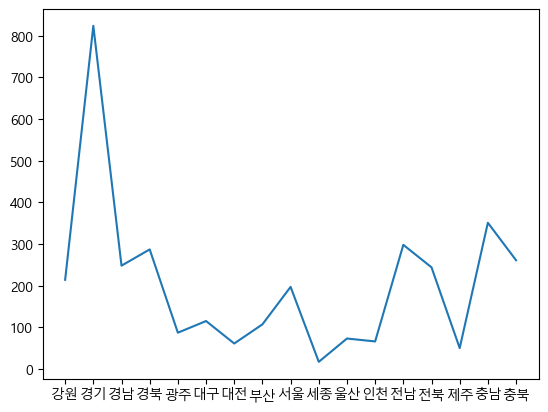

In [85]:
# 라인그래프는 시계열이 보기 좋음
# 각각의 데이터 비교는 바차트가 좋음
# 라인 그래프 그리기
plt.plot(x,y)
plt.show()


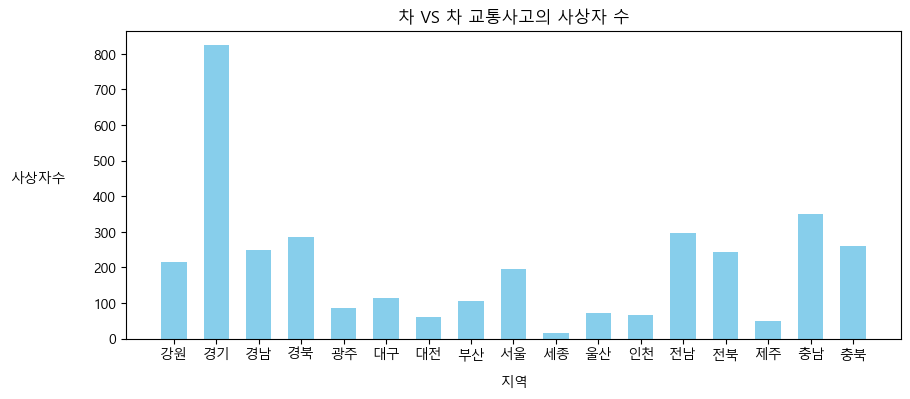

In [109]:
# x축 값 담아주기
x = res.index
# y축 값 담아주기
y = res['사상자수'].values

# 차트를 그릴 사이즈: 차트 그리기 전 설정을 해줘야 함으로 차트 그리기 전에 작성
plt.figure(figsize=(10,4))
plt.bar(x,y, color="skyblue", width=0.6)

# x축 이름
plt.xlabel("지역", labelpad=10)
# y축 이름, rotation=0: 가로출력
plt.ylabel("사상자수", labelpad=40).set_rotation(0)
# 그래프 이름
plt.title("차 VS 차 교통사고의 사상자 수")
plt.show()